In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline

We load the dataset and take a first look at it:

In [5]:
df = pd.read_csv('train.csv')
df.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
id                  object
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: int64(14), object(10)
memory usage: 7.2+ GB


We can count the number of different occurrences for each feature:

In [7]:
for col in df.columns:
    print(col + " " + str(len(df[col].unique())))

id 40428967
click 2
hour 240
C1 7
banner_pos 7
site_id 4737
site_domain 7745
site_category 26
app_id 8552
app_domain 559
app_category 36
device_id 2686408
device_ip 6729486
device_model 8251
device_type 5
device_conn_type 4
C14 2626
C15 8
C16 9
C17 435
C18 4
C19 68
C20 172
C21 60


We can remove id since we have a different value for each row:

In [8]:
df = df.drop('id', 1) # remove id

Check the following for some useful information:

- http://techblog.youdao.com/wp-content/uploads/2015/03/Avazu-CTR-Prediction.pdf (check pag 5) 
- http://www.csie.ntu.edu.tw/~r01922136/slides/kaggle-avazu.pdf 
- https://www.kaggle.com/c/avazu-ctr-prediction/discussion/12608 (in questions)

And select the 'device_id' most common: 

In [9]:
df['device_id'].value_counts()[:5]

a99f214a    33358308
0f7c61dc       21356
c357dbff       19667
936e92fb       13712
afeffc18        9654
Name: device_id, dtype: int64

In [10]:
df = df[df['device_id']=='a99f214a']

# Feature engineering

We follow this preprocessing https://github.com/guestwalk/kaggle-avazu/blob/master/base/util/gen_data.py, without using features counting.

## User

In [177]:
def def_user(row):    
    if row['device_id'] == 'a99f214a':
        user = 'ip-' + row['device_ip'] + '-' + row['device_model']
    else:
        user = 'id-' + row['device_id']
    return user

In [12]:
cols = ['device_id', 'device_ip', 'device_model']
df = df.assign(user_id=pd.Series(df[cols].apply(def_user, axis=1)).values)
df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,user_id
0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,2,15706,320,50,1722,0,35,-1,79,ip-ddd2926e-44956a24
1,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15704,320,50,1722,0,35,100084,79,ip-96809ac8-711ee120
2,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15704,320,50,1722,0,35,100084,79,ip-b3cf8def-8a4875bd
3,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15706,320,50,1722,0,35,100084,79,ip-e8275b8f-6332421a
4,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,0,18993,320,50,2161,0,35,-1,157,ip-9644d0bf-779d90c2


And select rows relative to users occurring more than 100 times:

In [13]:
n = df['user_id'].value_counts()[df['user_id'].value_counts()>=100].index
len(n)

16961

In [14]:
df = df.loc[df['user_id'].isin(n)]
df.shape

(5467360, 24)

In [15]:
for col in df.columns:
    print(col + " " + str(len(df[col].unique())))

click 2
hour 240
C1 3
banner_pos 5
site_id 1090
site_domain 920
site_category 18
app_id 858
app_domain 41
app_category 17
device_id 1
device_ip 10625
device_model 1032
device_type 1
device_conn_type 4
C14 1341
C15 6
C16 7
C17 302
C18 4
C19 55
C20 123
C21 54
user_id 16961


In [16]:
df.to_csv('filtered100.csv')

## Site & App

In [4]:
df = pd.read_csv('filtered100.csv')

In [5]:
def is_app(row):
    return True if row['site_id'] == '85f751fd' else False

In [187]:
def def_pub(x):
    y = {}
    if is_app(x):
        y['pub_id'] = x['app_id']
        y['pub_domain'] = x['app_domain']
        y['pub_category'] = x['app_category']
    else:
        y['pub_id'] = x['site_id']
        y['pub_domain'] = x['site_domain']
        y['pub_category'] = x['site_category']
    return pd.Series([y['pub_id'], y['pub_domain'], y['pub_category']])

In [ ]:
cols = ['app_id','app_domain','app_category','site_id','site_domain','site_category']
newcols = df[cols].apply(def_pub, axis=1)
newcols.columns = ['pub_id', 'pub_domain', 'pub_category']

In [10]:
df = df.join(newcols)
cols = ['pub_id','pub_domain','pub_category','banner_pos','device_model', \
          'device_conn_type','C14','C17','C20','C21','user_id']
for col in df[cols]:
    print(col + " " + str(len(df[col].unique())))

pub_id 1946
pub_domain 961
pub_category 34
banner_pos 5
device_model 1032
device_conn_type 4
C14 1341
C17 302
C20 123
C21 54
user_id 16961


In [11]:
del newcols
df.head()

,Unnamed: 0,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C16,C17,C18,C19,C20,C21,user_id,pub_id,pub_domain,pub_category
0,0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1,14,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,50,2371,0,551,-1,46,ip-6dec2796-aad45b01,98fed791,d9b5648e,0f2161f8
2,23,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,-1,79,ip-c6563308-7fdd04d2,1fbe01fe,f3845767,28905ebd
3,28,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,50,2333,0,39,-1,157,ip-50d86760-d787e91b,543a539e,c7ca3108,3e814130
4,29,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,50,1722,0,35,-1,79,ip-431b3174-f39b265e,1fbe01fe,f3845767,28905ebd


In [15]:
cols = ['app_id','app_domain','app_category','site_id','site_domain','site_category']
df.drop(cols, axis=1, inplace=True)

,Unnamed: 0,click,hour,C1,banner_pos,device_id,device_ip,device_model,device_type,device_conn_type,...,C16,C17,C18,C19,C20,C21,user_id,pub_id,pub_domain,pub_category
0,0,0,14102100,1005,0,a99f214a,ddd2926e,44956a24,1,2,...,50,1722,0,35,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1,14,0,14102100,1005,0,a99f214a,6dec2796,aad45b01,1,0,...,50,2371,0,551,-1,46,ip-6dec2796-aad45b01,98fed791,d9b5648e,0f2161f8
2,23,1,14102100,1005,0,a99f214a,c6563308,7fdd04d2,1,0,...,50,1722,0,35,-1,79,ip-c6563308-7fdd04d2,1fbe01fe,f3845767,28905ebd
3,28,0,14102100,1005,0,a99f214a,50d86760,d787e91b,1,0,...,50,2333,0,39,-1,157,ip-50d86760-d787e91b,543a539e,c7ca3108,3e814130
4,29,0,14102100,1005,0,a99f214a,431b3174,f39b265e,1,0,...,50,1722,0,35,-1,79,ip-431b3174-f39b265e,1fbe01fe,f3845767,28905ebd


In [16]:
cols = ['C1','C15','C16','C18','C19']
df.drop(cols, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467360 entries, 0 to 5467359
Data columns (total 17 columns):
Unnamed: 0          int64
click               int64
hour                int64
banner_pos          int64
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C17                 int64
C20                 int64
C21                 int64
user_id             object
pub_id              object
pub_domain          object
pub_category        object
dtypes: int64(10), object(7)
memory usage: 709.1+ MB


In [18]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,click,hour,banner_pos,device_id,device_ip,device_model,device_type,device_conn_type,C14,C17,C20,C21,user_id,pub_id,pub_domain,pub_category
0,0,14102100,0,a99f214a,ddd2926e,44956a24,1,2,15706,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1,0,14102100,0,a99f214a,6dec2796,aad45b01,1,0,20984,2371,-1,46,ip-6dec2796-aad45b01,98fed791,d9b5648e,0f2161f8
2,1,14102100,0,a99f214a,c6563308,7fdd04d2,1,0,15701,1722,-1,79,ip-c6563308-7fdd04d2,1fbe01fe,f3845767,28905ebd
3,0,14102100,0,a99f214a,50d86760,d787e91b,1,0,20366,2333,-1,157,ip-50d86760-d787e91b,543a539e,c7ca3108,3e814130
4,0,14102100,0,a99f214a,431b3174,f39b265e,1,0,15706,1722,-1,79,ip-431b3174-f39b265e,1fbe01fe,f3845767,28905ebd


In [20]:
df.to_csv('filtered100.csv')

## Hour

We modify the hour and introduce a new feature indicating whether the day is in the weekend or not:

In [10]:
import datetime

def isWeekend(d):
    """
    take df['hour'] as input and check whether the day is in the weekend.
    """
    d = str(d)
    year = '20' + d[:2]
    month = d[2:4]
    day = d[4:6]
    return int(datetime.date(int(year), int(month), int(day)).isoweekday()>4)

def hour(d):
    """
    take df['hour'] as input and convert it to:
        1 (morning 6-12) or,
        2 (afternoon 13-18) or,
        3 (night 19-5)
    """
    hour = int(str(d)[6:])
    if hour >=6 and hour <=12:
        return 1
    elif hour >= 13 and hour <= 18:
        return 2
    else:
        return 3
    
data = df.assign(day=pd.Series(df['hour'].apply(isWeekend)).values)
data = df.assign(hour=pd.Series(df['hour'].apply(hour)).values)
data.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,3,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,2,15706,320,50,1722,0,35,-1,79,0
6,0,3,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,...,0,20362,320,50,2333,0,39,-1,157,0
11,0,3,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15701,320,50,1722,0,35,-1,79,0
14,0,3,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,...,0,20984,320,50,2371,0,551,-1,46,0
16,0,3,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,0,17914,320,50,2043,2,39,-1,32,0


# Working on a reduced dataset

We are now going to work on a reduced version of the dataset, where we select rows with 'site_id' and 'app_id' attributes being the most common:

In [184]:
df['site_id'].value_counts()[:5]

85f751fd    151075
1fbe01fe    140643
d9750ee7     31882
e151e245     18271
543a539e      8015
Name: site_id, dtype: int64

In [185]:
df['app_id'].value_counts()[:5]

ecad2386    292355
3f2a6cbb     19389
e96773f0     12907
e2fcccd2     10731
f0d41ff1      8608
Name: app_id, dtype: int64

In [186]:
data = data.loc[(df['site_id']=='1fbe01fe') & (df['app_id']=='ecad2386')]
for col in data.columns:
    print(col + " " + str(len(data[col].unique())))

click 2
hour 3
C1 1
banner_pos 1
site_id 1
site_domain 1
site_category 1
app_id 1
app_domain 1
app_category 1
device_id 1
device_ip 532
device_model 542
device_type 1
device_conn_type 2
C14 33
C15 2
C16 2
C17 8
C18 3
C19 6
C20 9
C21 7
day 1


We plot some data information, according to this presentation http://techblog.youdao.com/wp-content/uploads/2015/03/Avazu-CTR-Prediction.pdf (check pag 5). Also, some other useful information could be in this other presentation http://www.csie.ntu.edu.tw/~r01922136/slides/kaggle-avazu.pdf and https://www.kaggle.com/c/avazu-ctr-prediction/discussion/12608 (in questions)

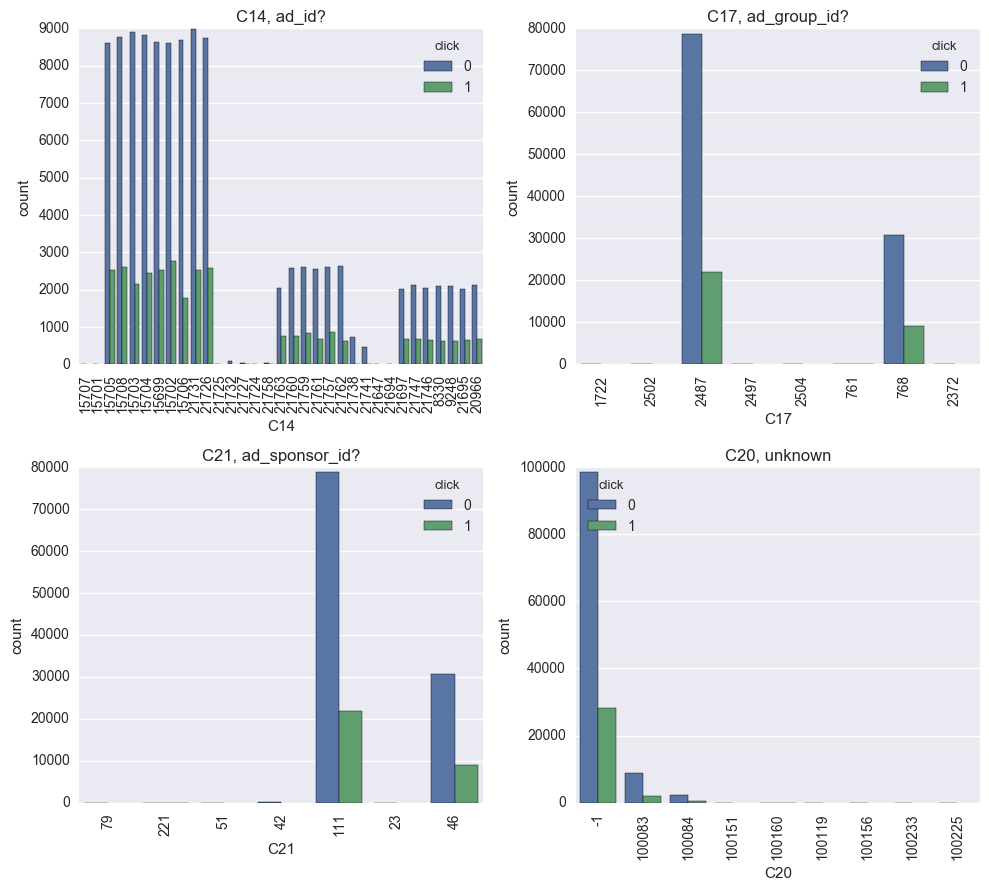

"\nfor c in counts[2]:\n    value_counts = df_train[c].value_counts()\n    fig, ax = plt.subplots(figsize=(10, 5))\n    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(df_train[c]))))\n    plt.xlabel('Feature value')\n    plt.ylabel('Occurences')\n    plt.bar(range(len(value_counts)), value_counts.values, color=pal[1])\n    ax.set_xticks(range(len(value_counts)))\n    ax.set_xticklabels(value_counts.index, rotation='vertical')\n    plt.show()\n"

In [187]:
plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(10, 9))
sns.countplot(x ='C14', hue = 'click',  data = data, ax=axarr[0,0])
axarr[0, 0].set_title('C14, ad_id?')
value_counts = data['C14'].value_counts()
axarr[0, 0].set_xticklabels(value_counts.index, rotation='vertical')
sns.countplot(x ='C17', hue = 'click',  data = data, ax=axarr[0, 1])
axarr[0, 1].set_title('C17, ad_group_id?')
value_counts = data['C17'].value_counts()
axarr[0, 1].set_xticklabels(value_counts.index, rotation='vertical')
sns.countplot(x ='C21', hue = 'click',  data = data, ax=axarr[1, 0])
axarr[1, 0].set_title('C21, ad_sponsor_id?')
value_counts = data['C21'].value_counts()
axarr[1, 0].set_xticklabels(value_counts.index, rotation='vertical')
sns.countplot(x ='C20', hue = 'click',  data = data, ax=axarr[1, 1])
axarr[1, 1].set_title('C20, unknown')
value_counts = data['C20'].value_counts()
axarr[1, 1].set_xticklabels(value_counts.index, rotation='vertical')
plt.tight_layout()
plt.show()


# Feature Hashing

We use feature hashing from the python package category_encoders: https://github.com/scikit-learn-contrib/categorical-encoding/blob/master/category_encoders/hashing.py

In [21]:
import hashlib
import sys

def hashing_trick(X, hashing_method='md5', N=2, cols=None):
        """A basic hashing implementation with configurable dimensionality/precision
        Performs the hashing trick on a pandas dataframe, `X`, using the hashing method from hashlib
        identified by `hashing_method`.  The number of output dimensions (`N`), and columns to hash (`cols`) are
        also configurable.
        Parameters
        ----------
        X_in: pandas dataframe
            description text
        hashing_method: string, optional
            description text
        N: int, optional
            description text
        cols: list, optional
            description text
        make_copy: bool, optional
            description text
        Returns
        -------
        out : dataframe
            A hashing encoded dataframe.
        References
        ----------
        Cite the relevant literature, e.g. [1]_.  You may also cite these
        references in the notes section above.
        .. [1] Kilian Weinberger; Anirban Dasgupta; John Langford; Alex Smola; Josh Attenberg (2009). Feature Hashing
        for Large Scale Multitask Learning. Proc. ICML.
        """

        try:
            if hashing_method not in hashlib.algorithms_available:
                raise ValueError('Hashing Method: %s Not Available. Please use one from: [%s]' % (
                    hashing_method,
                    ', '.join([str(x) for x in hashlib.algorithms_available])
                ))
        except Exception as e:
            try:
                _ = hashlib.new(hashing_method)
            except Exception as e:
                raise ValueError('Hashing Method: %s Not Found.')

        if cols is None:
            cols = X.columns.values

        def hash_fn(x):
            tmp = [0 for _ in range(N)]
            for val in x.values:
                if val is not None:
                    hasher = hashlib.new(hashing_method)
                    if sys.version_info[0] == 2:
                        hasher.update(str(val))
                    else:
                        hasher.update(bytes(str(val), 'utf-8'))
                    tmp[int(hasher.hexdigest(), 16) % N] += 1
            return pd.Series(tmp, index=new_cols)

        new_cols = ['col_%d' % d for d in range(N)]

        X_cat = X.reindex(columns=cols)
        X_num = X.reindex(columns=[x for x in X.columns.values if x not in cols])

        X_cat = X_cat.apply(hash_fn, axis=1)
        X_cat.columns = new_cols

        X = pd.merge(X_cat, X_num, left_index=True, right_index=True)

        return X
    

using murmurash3 for hashing:

In [22]:
def hashing_trick_mmh3(X, N=2, cols=None):
        """A basic hashing implementation with configurable dimensionality/precision
        Performs the hashing trick on a pandas dataframe, `X`, using the mmh3 library.  
        The number of output dimensions (`N`), and columns to hash (`cols`) are
        also configurable.
        Parameters
        ----------
        X_in: pandas dataframe
            description text
        N: int, optional
            description text
        cols: list, optional
            description text
        Returns
        -------
        out : dataframe
            A hashing encoded dataframe.
        References
        ----------
        Cite the relevant literature, e.g. [1]_.  You may also cite these
        references in the notes section above.
        .. [1] Kilian Weinberger; Anirban Dasgupta; John Langford; Alex Smola; Josh Attenberg (2009). Feature Hashing
        for Large Scale Multitask Learning. Proc. ICML.
        """
        import mmh3
        
        if cols is None:
            cols = X.columns.values

        def hash_fn(x):
            tmp = [0 for _ in range(N)]
            for pos, val in enumerate(x.values):
                if val is not None:
                    val = str(pos) + str(val)
                    tmp[mmh3.hash(val) % N] += 1            
            return pd.Series(tmp, index=new_cols)

        new_cols = ['col_%d' % d for d in range(N)]

        X_cat = X.reindex(columns=cols)
        X_num = X.reindex(columns=[x for x in X.columns.values if x not in cols])

        X_cat = X_cat.apply(hash_fn, axis=1)
        X_cat.columns = new_cols

        X = pd.merge(X_cat, X_num, left_index=True, right_index=True)

        return X

In [195]:
#%timeit a = hashing_trick(df, N=15, cols=None)
col = ['C14','C17', 'C20','C21']
a = hashing_trick(data[col], N=20)
a.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
12,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0
17,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0


In [23]:
def one_hot_hashing(x):
    """
    Perform one-hot-encoding after hashing trick
    """
    x[np.where(x)[0]] = 1
    return x

In [ ]:
a.apply(one_hot_hashing, axis=1)
a.head()

In [197]:
a = a.div(a.sum(axis=1), axis=0) # normalize
a.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.25,0.250000,0.0,0.0,0.250000,0.00,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.00,0.250000,0.0,0.0,0.250000,0.25,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.25,0.250000,0.0,0.0,0.250000,0.00,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.00,0.333333,0.0,0.0,0.333333,0.00,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.00,0.250000,0.0,0.0,0.250000,0.25,0.0,0.0,0.0


In [192]:
#%timeit b = hashing_trick_mmh3(df, N=20, cols=None)
b = hashing_trick_mmh3(data, N=20, cols=None)
b.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,1,3,1,3,0,3,2,0,1,0,1,0,1,2,0,2,0,1,3,0
6,2,1,1,2,0,4,2,0,1,0,1,0,1,2,0,1,0,2,3,1
9,1,2,0,3,0,4,2,0,1,0,2,1,1,2,0,1,0,1,3,0
12,1,2,0,2,1,4,2,0,2,0,1,0,1,2,0,2,0,1,3,0
17,2,2,1,2,0,4,2,0,1,0,1,0,1,2,1,1,0,1,3,0


In [193]:
#del a 
#del b

## Logistic Regression

We are now going to use logistic regression to select the best number of bins to use for feature hashing.

In [24]:
cols = ['pub_id','pub_domain','pub_category','banner_pos','device_model', \
          'device_conn_type','C14','C17','C20','C21']
indices = []
for i in cols:
    indices.append(df.columns.get_loc(i))
X2 = df.iloc[:100000, indices]
y2 = df.iloc[:100000, df.columns.get_loc('click')]
print('One-hot encoding')
X2 = pd.concat([pd.get_dummies(X2[c]) for c in cols], axis=1)
print('Shape after: ')
print(X2.shape)

One-hot encoding
Shape after: 
(100000, 1694)


NameError: name 'train_test_split' is not defined

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

split = train_test_split(X2, y2, test_size = 0.7, random_state = 39)
(trainData, testData, trainTarget, testTarget) = split
model = LogisticRegression(C=1, penalty='l2', tol=0.001)
model.fit(trainData, trainTarget)
print(metrics.accuracy_score(model.predict(testData), testTarget))
print(np.unique(model.predict(testData)))

0.832328571429
[0 1]


Using feature hashing:

number of features: 200
[0]
accuracy: 0.828
number of features: 300
[0]
accuracy: 0.828
number of features: 400
[0]
accuracy: 0.828
number of features: 500
[0]
accuracy: 0.828


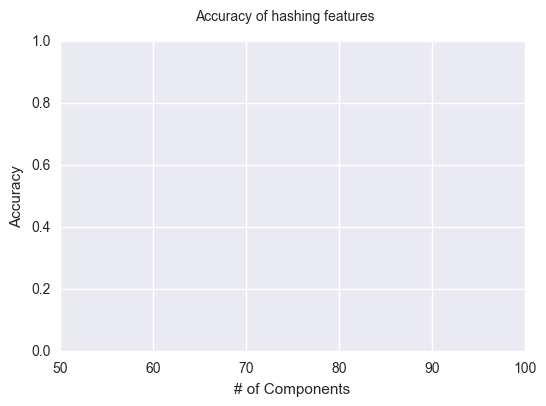

In [30]:
# initialize parameters
accuracies = []
components = [200, 300, 400, 500]

# split data in train and test set
cols = ['pub_id','pub_domain','pub_category','banner_pos','device_model', \
          'device_conn_type','C14','C17','C20','C21']
indices = []
for i in cols:
    indices.append(df.columns.get_loc(i))
y = df.iloc[:100000, df.columns.get_loc('click')]

for i, comp in enumerate(components):
    # hashing features
    X = hashing_trick_mmh3(df.iloc[:100000, indices], N=comp)
    X.apply(one_hot_hashing, axis=1)
    X = X.div(X.sum(axis=1), axis=0) # normalize
    split = train_test_split(X, y, test_size = 0.7, random_state = 39)
    (trainData, testData, trainTarget, testTarget) = split
    
    print("number of features: {:d}".format(X.shape[1]))
    #print(trainData.head())
    
    # train the classifier again
    model = LogisticRegression(C=0.01, penalty='l2', tol=0.001)
    model.fit(trainData, trainTarget)
    
    # evaluate the model and update the list of accuracies 
    value = metrics.accuracy_score(model.predict(testData), testTarget)
    accuracies.append(value)
    
    print(np.unique(model.predict(testData)))
    print("accuracy: {:0.3f}".format(value))
    
# create the figure
plt.figure()
plt.suptitle("Accuracy of hashing features")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
plt.xlim([50, 100])
plt.ylim([0, 1.0])
plt.scatter(components, accuracies)
plt.show()

This model predicts all 0s! :(

It's not reliable..

### 1 Mln data points

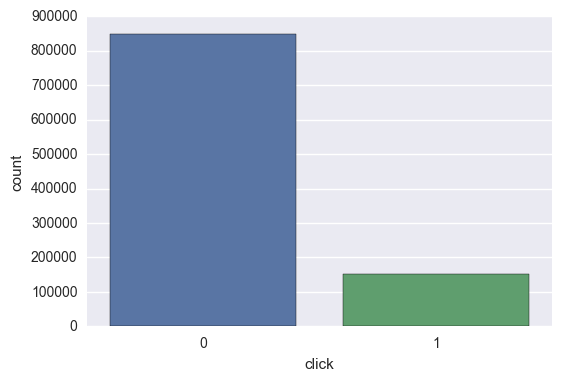

In [44]:
sns.countplot(x='click', data = df.iloc[:1000000, [0,1]])

In [47]:
def one_zero(x):
    x[x.nonzero()[0]] = 1
    return x

import time

# initialize parameters
accuracies = []
components = [30, 40, 50]

# split data in train and test set
cols = ['pub_id','pub_domain','pub_category','banner_pos','device_model', \
          'device_conn_type','C14','C17','C20','C21']
indices = []
for i in cols:
    indices.append(df.columns.get_loc(i))
y = df.iloc[:1000000, df.columns.get_loc('click')]

for i, comp in enumerate(components):
    start = time.time()
    # hashing features
    print('hashing features..')
    X = hashing_trick_mmh3(df.iloc[:1000000, indices], N=comp)
    print('one-hot encoding..')
    X.apply(one_zero)
    print('normalizing..')
    X = X.div(X.sum(axis=1), axis=0) # normalize
    split = train_test_split(X, y, test_size = 0.7, random_state = 39)
    (trainData, testData, trainTarget, testTarget) = split
    
    print("number of features: {:d}".format(X.shape[1]))
    #print(trainData.head())
    
    # train the classifier again
    print('training..')
    model = LogisticRegression(C=1, penalty='l1', tol=0.001)
    model.fit(trainData, trainTarget)
    
    # evaluate the model and update the list of accuracies 
    print('predicting..')
    value = metrics.accuracy_score(model.predict(testData), testTarget)
    print(np.unique(model.predict(testData)))
    accuracies.append(value)
    
    print("accuracy: {:0.3f}".format(value))
    end = time.time()
    print('secs: {}'.format(end-start))
    print('\n')

hashing features..
one-hot encoding..
normalizing..
number of features: 30
training..
predicting..
[0 1]
accuracy: 0.848
secs: 373.1156761646271


hashing features..
one-hot encoding..
normalizing..
number of features: 40
training..
predicting..
[0 1]
accuracy: 0.847
secs: 393.934935092926


hashing features..
one-hot encoding..
normalizing..
number of features: 50
training..
predicting..
[0 1]
accuracy: 0.848
secs: 390.713054895401




# Building the dataset

## Collisions analysis

In [77]:
df[df['user_id']=='ip-ddd2926e-44956a24'].shape

(102, 16)

In [101]:
subset = df[df['user_id']=='ip-ddd2926e-44956a24']
subset.head()

,click,hour,banner_pos,device_id,device_ip,device_model,device_type,device_conn_type,C14,C17,C20,C21,user_id,pub_id,pub_domain,pub_category
0,0,14102100,0,a99f214a,ddd2926e,44956a24,1,2,15706,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
6626,1,14102100,0,a99f214a,ddd2926e,44956a24,1,2,15707,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
9239,1,14102100,0,a99f214a,ddd2926e,44956a24,1,2,15708,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
16640,0,14102101,0,a99f214a,ddd2926e,44956a24,1,2,15707,1722,-1,79,ip-ddd2926e-44956a24,6256f5b4,28f93029,f028772b
30016,0,14102101,0,a99f214a,ddd2926e,44956a24,1,2,15702,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd


In [102]:
col = ['pub_id','pub_domain','pub_category','banner_pos','device_model', \
          'device_conn_type','C14','C17','C20','C21']
subset[subset.duplicated(subset=col)==True].shape

(45, 16)

In [99]:
subset[subset.duplicated(subset=col)==True]

,click,hour,banner_pos,device_id,device_ip,device_model,device_type,device_conn_type,C14,C17,C20,C21,user_id,pub_id,pub_domain,pub_category
88362,0,14102104,0,a99f214a,ddd2926e,44956a24,1,2,15707,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
576340,1,14102206,0,a99f214a,ddd2926e,44956a24,1,2,15701,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1144780,0,14102213,0,a99f214a,ddd2926e,44956a24,1,2,15708,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1487253,0,14102303,0,a99f214a,ddd2926e,44956a24,1,2,15705,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1608835,1,14102308,0,a99f214a,ddd2926e,44956a24,1,2,15705,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1817011,0,14102316,0,a99f214a,ddd2926e,44956a24,1,2,15703,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1822464,0,14102316,0,a99f214a,ddd2926e,44956a24,1,2,15703,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1823342,0,14102316,0,a99f214a,ddd2926e,44956a24,1,2,15708,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1830189,0,14102317,0,a99f214a,ddd2926e,44956a24,1,2,15708,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1865919,0,14102318,0,a99f214a,ddd2926e,44956a24,1,2,15707,1722,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd


Hashing into 30 buckets:

In [103]:
subset = hashing_trick_mmh3(subset, N=30, cols=col)
subset.drop(['hour','device_id','device_type','device_ip'], 1, inplace=True) # remove id
subset

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,click,user_id
0,0,0,0,1,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
6626,0,0,0,1,2,0,2,0,1,0,...,0,0,1,0,0,0,0,0,1,ip-ddd2926e-44956a24
9239,0,0,0,1,2,0,2,0,0,0,...,1,0,1,0,0,0,0,0,1,ip-ddd2926e-44956a24
16640,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
30016,0,0,0,1,2,0,2,0,0,0,...,1,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
57962,0,0,0,2,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
88362,0,0,0,1,2,0,2,0,1,0,...,0,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
383642,0,1,0,1,2,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,ip-ddd2926e-44956a24
423541,0,0,0,1,2,1,2,0,0,1,...,0,0,0,1,0,0,0,0,0,ip-ddd2926e-44956a24
452247,0,0,0,1,2,1,2,0,0,0,...,0,0,0,1,0,0,1,0,1,ip-ddd2926e-44956a24


In [110]:
subset[subset.duplicated(subset=[c for c in subset.columns if not c=='click'])==True].shape

(46, 32)

In [63]:
indices = subset.index.tolist()

In [76]:
indices[:5]

[0, 6626, 9239, 16640, 30016]

In [71]:
subset = X.loc[indices]
subset.shape

(102, 30)

In [74]:
subset[subset.duplicated()==True].shape

(50, 30)

In [115]:
user_interactions = subset.groupby('click') # there will be 2 groups: 0/1
ones = user_interactions.get_group(1)
zeros = user_interactions.get_group(0)
print(ones.shape)
print(zeros.shape)

(27, 32)
(75, 32)


In [117]:
zeros[zeros.duplicated()==True].shape

(28, 32)

In [119]:
ones[ones.duplicated()==True].shape

(9, 32)

In [125]:
dd = pd.DataFrame(['a','b','c','d','a','b'])
dd[~dd.duplicated(keep='first')]

,0
0,a
1,b
2,c
3,d


In [138]:
zeros[~zeros.duplicated(keep='first')].shape

(47, 32)

In [146]:
k = 10
l = []

user_interactions = subset.groupby('click') # there will be 2 groups: 0/1
ones = user_interactions.get_group(1)
zeros = user_interactions.get_group(0)
zeros = zeros[~zeros.duplicated(keep='first')]

for index_and_row in ones.iterrows():
    r = pd.concat([zeros.sample(n=k-1), index_and_row[1].to_frame().transpose()])
    l.append(r.iloc[np.random.permutation(len(r))])
    
random.shuffle(l)
l[0]

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,click,user_id
57962,0,0,0,2,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
742293,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,2,0,ip-ddd2926e-44956a24
452247,0,0,0,1,2,1,2,0,0,0,...,0,0,0,1,0,0,1,0,1,ip-ddd2926e-44956a24
1523765,0,0,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,ip-ddd2926e-44956a24
4478894,0,0,0,1,2,0,2,0,0,0,...,0,0,1,1,0,0,1,0,0,ip-ddd2926e-44956a24
0,0,0,0,1,2,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,ip-ddd2926e-44956a24
1527648,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,2,0,0,ip-ddd2926e-44956a24
2146954,0,0,0,1,2,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,ip-ddd2926e-44956a24
4272452,0,0,1,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,ip-ddd2926e-44956a24
4356491,0,0,0,1,1,0,2,0,0,0,...,0,0,1,1,0,0,0,1,0,ip-ddd2926e-44956a24


In [158]:
co = [c for c in l[0].columns if not c=='user_id']
np.linalg.norm(l[0][co],axis=1)

AttributeError: 'int' object has no attribute 'sqrt'

In [165]:
l[0][co].apply(lambda x: np.sqrt(x.dot(x)), axis=1)

57962      4.000000
742293     3.464102
452247     3.872983
1523765    3.162278
4478894    3.741657
0          4.000000
1527648    3.464102
2146954    4.000000
4272452    3.464102
4356491    3.464102
dtype: float64

In [167]:
l[0][co].apply(lambda x: x/np.sqrt(x.dot(x)), axis=1)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,click
57962,0.0,0.0,0.000000,0.500000,0.500000,0.000000,0.500000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
742293,0.0,0.0,0.000000,0.288675,0.288675,0.288675,0.288675,0.288675,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000
452247,0.0,0.0,0.000000,0.258199,0.516398,0.258199,0.516398,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.258199,0.000000,0.000000,0.258199,0.000000,0.258199
1523765,0.0,0.0,0.000000,0.316228,0.316228,0.000000,0.316228,0.000000,0.0,0.316228,...,0.0,0.0,0.316228,0.000000,0.316228,0.316228,0.000000,0.316228,0.000000,0.000000
4478894,0.0,0.0,0.000000,0.267261,0.534522,0.000000,0.534522,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.267261,0.267261,0.000000,0.000000,0.267261,0.000000,0.000000
0,0.0,0.0,0.000000,0.250000,0.500000,0.000000,0.500000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1527648,0.0,0.0,0.000000,0.288675,0.288675,0.000000,0.288675,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.288675,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000
2146954,0.0,0.0,0.000000,0.250000,0.500000,0.000000,0.500000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4272452,0.0,0.0,0.288675,0.288675,0.288675,0.000000,0.288675,0.000000,0.0,0.000000,...,0.0,0.0,0.288675,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000
4356491,0.0,0.0,0.000000,0.288675,0.288675,0.000000,0.577350,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,0.288675,0.000000


In [168]:
X.shape

(5467360, 30)

In [169]:
df.shape

(5467360, 16)

## Feature Hashing

In [48]:
cols = ['pub_id','pub_domain','pub_category','banner_pos','device_model', \
          'device_conn_type','C14','C17','C20','C21']
X = hashing_trick_mmh3(df[cols], N=30)
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29
0,0,0,0,1,2,0,2,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,1
2,0,0,0,1,2,1,1,0,0,0,...,1,0,0,0,2,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,2,0,0,1,1,0
4,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,2,0,0,0,0,0


In [49]:
print('one-hot encoding..')
X.apply(one_zero)
print('normalizing..')
X = X.div(X.sum(axis=1), axis=0) # normalize
X.head()

one-hot encoding..
normalizing..


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29
0,0.0,0.0,0.0,0.142857,0.142857,0.000,0.142857,0.0,0.0,0.0,...,0.142857,0.0,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.111111,0.000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.111111,0.000000,0.111111,0.111111,0.0,0.000000,0.111111,0.111111
2,0.0,0.0,0.0,0.125000,0.125000,0.125,0.125000,0.0,0.0,0.0,...,0.125000,0.0,0.000000,0.000000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.111111,0.000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.111111,0.111111,0.000000,0.0,0.111111,0.111111,0.000000
4,0.0,0.0,0.0,0.000000,0.142857,0.000,0.142857,0.0,0.0,0.0,...,0.142857,0.0,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000,0.000000


In [50]:
X.to_csv('processed100.csv')

In [53]:
for col in X.columns:
    print(col + " " + str(len(X[col].unique())))

col_0 6
col_1 6
col_2 6
col_3 7
col_4 7
col_5 6
col_6 7
col_7 7
col_8 6
col_9 6
col_10 7
col_11 6
col_12 6
col_13 7
col_14 7
col_15 7
col_16 6
col_17 7
col_18 7
col_19 6
col_20 7
col_21 7
col_22 7
col_23 6
col_24 7
col_25 6
col_26 6
col_27 6
col_28 6
col_29 7


In [ ]:
grouped = X.groupby(['device_ip'])
k = 9
l = []
for name, group in grouped:
    user_interactions = group.groupby('click') # there will be 2 groups: 0/1
    try:
        ones = user_interactions.get_group(1)
    except:
        print('no ones')
        continue
    zeros = user_interactions.get_group(0)
    # compute the number of splits per user and split the interactions
    num_of_splits = len(zeros)//k
    splits = np.array_split(zeros, num_of_splits)
    # build the rounds with k-zeros rewards a 1-one reward
    for index_and_row, split in zip(ones.iterrows(), splits):
        r = pd.concat([split, index_and_row[1].to_frame().transpose()])
        # add the round to the list (after shuffling)
        if len(r)>10:
            r.drop(r.index[:len(r)-10], inplace=True)
        l.append(r.iloc[np.random.permutation(len(r))])
        
random.shuffle(l)

In [ ]:
for i in range(3):
    print(l[i])

In [ ]:
df = pd.concat(l)
rewards = pd.DataFrame(df['click'])
users = pd.DataFrame(df['device_ip'])

col = [item for item in df.columns if item not in ['click', 'device_ip']]
df = pd.concat([pd.get_dummies(df[c]) for c in col], axis=1)
df = df.div(df.sum(axis=1), axis=0) # normalize
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(users['device_ip']))
users['device_ip'] = le.transform(users['device_ip'])
sorted(users['device_ip'].unique())

In [ ]:
rewards.to_csv('processed/medium/reward_list.csv')
df.to_csv('processed/medium/processed10k.csv')
users.to_csv('processed/medium/users.csv')

In [ ]:
t = 0
df.iloc[t*10:t*10+10]